# **GENERAL MOTORS: Providing Insights to Chief in Electric and Hybrid Vehicles**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors.  The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.

# **PACE Stages**

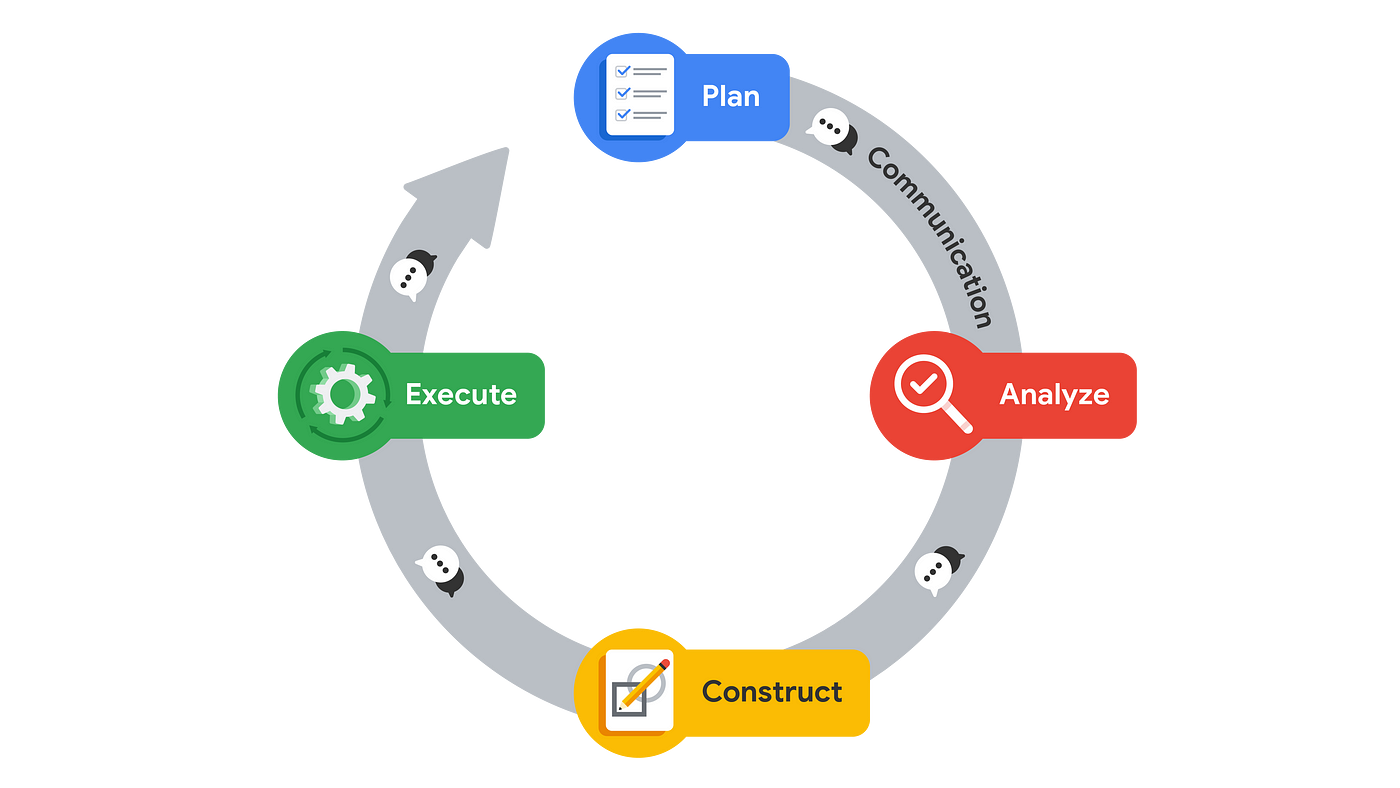
Plan: The planning stage is where you conceptualize the scope of the project and develop the steps that will guide you through the process of completing a project. Here are a few planning stage tasks:
- Research business data
- Define the project scope
- Develop a workflow
- Assess project and/or stakeholder needs

Analyze: The analyzing stage is where you will collect, prepare, and analyze all of the data for your project. Here are a few analyzing stage tasks:
- Format database
- Scrub data
- Convert data into usable formats

Construct: In the construction stage you will build models that will allow you access to hidden relationships locked within data. Here are a few construction stage tasks:
- Select modeling approach
- Build models
- Build machine learning algorithms

Execute: In the execution stage you will present the finding of your analysis, receive feedback, and make revisions as necessary. Here are a few execution stage tasks:
- Share results
- Present findings to other stakeholders
- Address feedback

# **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

## Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company. 

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

## Familiarize yourself with the HR dataset 

In this [dataset](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv), there are 14,999 rows, 10 columns, and these variables: 

Variable  |Description |
-----|-----| 
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project? 
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage? 

## Step 1. Imports

*   Import packages
*   Load dataset

### Importing Required Libraries

In [5]:
# import library used for data processing
import pandas as pd
pd.set_option('display.max_columns', None) # to remove the limit of columns shows as output
import numpy as np
import datetime as dt
import copy
from IPython.display import display

# import library for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Loading Data

In [6]:
# sales by state
sales_by_states = pd.read_csv("C:/Users/PC/Downloads/General_Motors-Provide_Insights_to_Chief_in_Electric_and_Hybrid_Vehicles/data/raw_data/electric_vehicle_sales_by_state.csv")
# sales by maker
sales_by_makers = pd.read_csv("C:/Users/PC/Downloads/General_Motors-Provide_Insights_to_Chief_in_Electric_and_Hybrid_Vehicles/data/raw_data/electric_vehicle_sales_by_makers.csv")
# dim_date
dim_date = pd.read_csv("C:/Users/PC/Downloads/General_Motors-Provide_Insights_to_Chief_in_Electric_and_Hybrid_Vehicles/data/raw_data/dim_date.csv")

## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers) 

### Electric Vehicle Sales by State
- date: The date on which the data was recorded. Format: DD-MMM-YY. (Data is recorded on a monthly basis)
- state: The name of the state where the sales data is recorded. This indicates the geographical location within India.
- vehicle_category: The category of the vehicle, specifying whether it is a 2-Wheeler or a 4-Wheeler.
- electric_vehicles_sold: The number of electric vehicles sold in the specified state and category on the given date.
- total_vehicles_sold: The total number of vehicles (including both electric and non-electric) sold in the specified state and category on the given date.

#### Gather basic information about the data

In [7]:
# Gather basic information about the data
sales_by_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2445 entries, 0 to 2444
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    2445 non-null   object
 1   state                   2445 non-null   object
 2   vehicle_category        2445 non-null   object
 3   electric_vehicles_sold  2445 non-null   int64 
 4   total_vehicles_sold     2445 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 95.6+ KB


In [92]:
# top records
sales_by_states.head()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,01-Apr-21,Sikkim,2-Wheelers,0,398
1,01-Apr-21,Sikkim,4-Wheelers,0,361
2,01-May-21,Sikkim,2-Wheelers,0,113
3,01-May-21,Sikkim,4-Wheelers,0,98
4,01-Jun-21,Sikkim,2-Wheelers,0,229


In [93]:
# last record
sales_by_states.tail()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
2440,01-Mar-24,Mizoram,2-Wheelers,58,1932
2441,01-Mar-24,DNH and DD,2-Wheelers,25,780
2442,01-Mar-24,Manipur,2-Wheelers,13,1394
2443,01-Mar-24,Andaman & Nicobar Island,2-Wheelers,2,447
2444,01-Mar-24,Nagaland,2-Wheelers,2,1180


#### Gather descriptive statistics about the data

In [9]:
# Gather descriptive statistics about the data
sales_by_states.describe().T

,count,mean,std,min,25%,50%,75%,max
electric_vehicles_sold,2445.0,845.035174,2185.167744,0.0,2.0,54.0,534.0,26668.0
total_vehicles_sold,2445.0,23402.966053,38353.266389,1.0,1158.0,6098.0,29396.0,387983.0


#### Rename Columns
As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [11]:
# Display all column names
sales_by_states.columns

Index(['date', 'state', 'vehicle_category', 'electric_vehicles_sold',
       'total_vehicles_sold'],
      dtype='object')

In [12]:
# Rename columns as needed
## code here

# Display all column names after the update
sales_by_states.columns

Index(['date', 'state', 'vehicle_category', 'electric_vehicles_sold',
       'total_vehicles_sold'],
      dtype='object')

#### Check Unique values
Check for any Unique values in the data.

In [48]:
# check for unique values
sales_by_states.nunique()

date                        36
state                       35
vehicle_category             2
electric_vehicles_sold     921
total_vehicles_sold       2225
dtype: int64

In [50]:
# check unique values in vehicle category column
print(f"{sales_by_states['vehicle_category'].unique()}")
print(f"Number of Unique Vehicle Category in Data is {sales_by_states['vehicle_category'].unique().shape[0]}")

['2-Wheelers' '4-Wheelers']
Number of Unique Vehicle Category in Data is 2


In [52]:
# check unique values in maker column
print(f"{sales_by_states['state'].unique()}")
print(f"Number of Unique Maker in Data is {sales_by_states['state'].unique().shape[0]}")

['Sikkim' 'Andaman & Nicobar Island' 'Arunachal Pradesh' 'Assam'
 'Chhattisgarh' 'DNH and DD' 'Jammu and Kashmir' 'Ladakh' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Puducherry' 'Tripura' 'Bihar'
 'Chandigarh' 'Delhi' 'Madhya Pradesh' 'Odisha' 'Punjab' 'Uttarakhand'
 'Himachal Pradesh' 'Andaman & Nicobar' 'Haryana' 'Jharkhand'
 'Andhra Pradesh' 'Goa' 'Gujarat' 'Karnataka' 'Kerala' 'Maharashtra'
 'Rajasthan' 'Tamil Nadu' 'Uttar Pradesh' 'West Bengal']
Number of Unique Maker in Data is 35


#### Check missing values
Check for any missing values in the data.

##### Checking Missing Values

In [17]:
# Check for missing values
sales_by_states.isnull().sum()

date                      0
state                     0
vehicle_category          0
electric_vehicles_sold    0
total_vehicles_sold       0
dtype: int64

In [33]:
# judgment:
# There are no missing values in the data.

##### Handling Missing Values

In [34]:
# code here

#### Check duplicates
Check for any duplicate entries in the data.

##### Checking Duplicates Values

In [18]:
# Check for duplicates
sales_by_states.duplicated().sum()

0

In [26]:
# judgment:
# there are no rows contain duplicates. That is 0% of the data.

In [20]:
# inspect some rows containing duplicates as needed
sales_by_states[sales_by_states.duplicated()].head()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold


In [21]:
# inspect some rows containing duplicates as needed
sales_by_states[sales_by_states.duplicated()].tail()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold


In [28]:
# The above output shows the first five Occurrences of rows that are duplicated farther down in the DataFrame.
# How likely is it that these are legitimate entries? In other words, how plausible is it that two employees self-reported the exact same response for every column?

# You could perform a likelihood analysis by essentially applying Bayes' theorem and multiplying the probabilities of finding each value in each column, but this does not seem necessary.
# With several continuous variables across 10 columns, it seems very unlikely that these observations are legitimate. You can proceed by dropping them.

##### Handling Duplicates
Handling for any duplicate entries in the data.

In [29]:
# Drop duplicates and save resulting dataframe in a new variable as needed
# code here

# display first few rows of new DataFrame as needed
sales_by_states.head()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,01-Apr-21,Sikkim,2-Wheelers,0,398
1,01-Apr-21,Sikkim,4-Wheelers,0,361
2,01-May-21,Sikkim,2-Wheelers,0,113
3,01-May-21,Sikkim,4-Wheelers,0,98
4,01-Jun-21,Sikkim,2-Wheelers,0,229


#### Check Outliers
Check for outliers in the data.

In [ ]:
# functions for calculating outliers
def check_outlier(df, column):
    """_summary_

    Args:
        df (_type_): _description_
        column (_type_): _description_
    """
    # calculate percentage values:
    Q1 = df[column].quantile(0.25)
    Q2 = df[column].quantile(0.5)
    Q3 = df[column].quantile(0.75)
    # calculate the inter quartile range (IQR)
    IQR = Q3 - Q1
    # define lower, median, and upper thresholds to identify outliers 
    lower = Q1 - 1.5 * IQR # the lower threshold, calculated as Q1 minus 1.5 times IQR
    median = Q2 
    upper = Q3 + 1.5 * IQR # the upper threshold, calculated as Q3 plus 1.5 times IQR
    # calculate the percentage of outliers
    # The total number of values greater than upper or less than lower is divided by the total number of values in the column
    # Then multiplied by 100 to get the percentage.
    percent_outliers = round(((df[df[column] > upper].shape[0]) + (df[df[column] < lower].shape[0])) / df.shape[0] * 100, 2)
# Create a DataFrame containing statistical indices
    result = pd.DataFrame({
        'lower_bound': [lower],
        'median': [median],
        'upper_bound': [upper],
        'percent_outliers': [percent_outliers]
    })
    # returns calculated values
    return result

##### Checking Outlier of 'electric_vehicles_sold' column in DataFrame

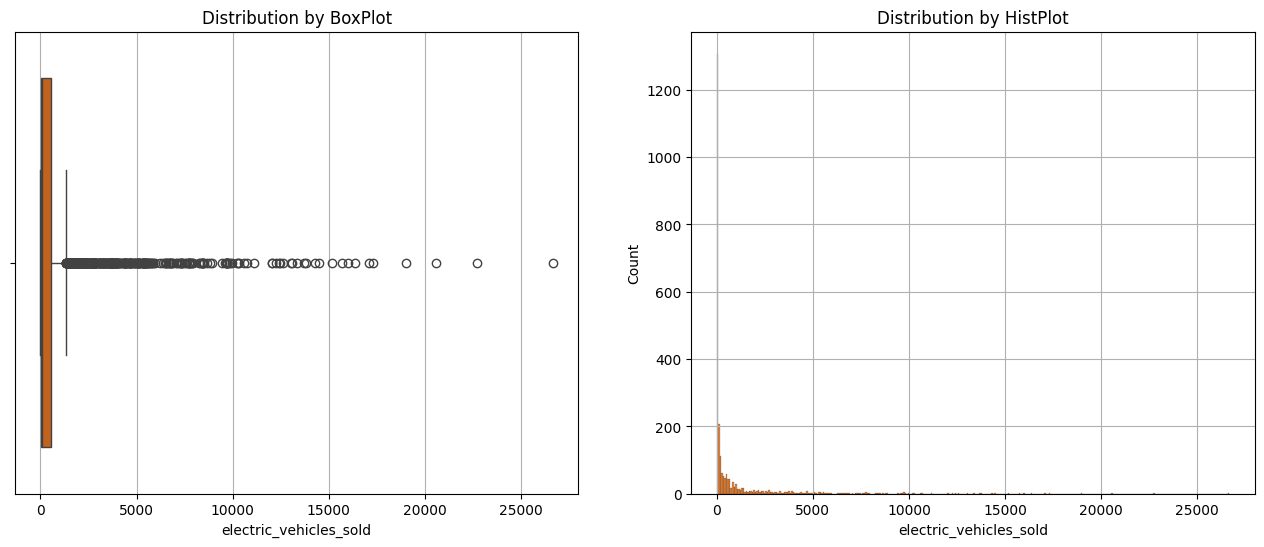

The Skew of Sold Quantity Data is: 4.71


In [ ]:
# overview of outliers
# set the size of chart
plt.figure(figsize=(16,6))
# first subplot by box plot
plt.subplot(1,2,1)
plt.grid()
sns.boxplot(data=sales_by_states, x='electric_vehicles_sold', color='#DC5F00')
plt.title("Distribution by BoxPlot")
# second subplot by hist plot
plt.subplot(1,2,2)
plt.grid()
sns.histplot(data=sales_by_states, x='electric_vehicles_sold', color='#DC5F00')
plt.title("Distribution by HistPlot")
# plot the chart
plt.show()
# Check the skewness of data in the "sold_quantity" column
print(f"The Skew of Sold Quantity Data is: {round(sales_by_states['electric_vehicles_sold'].skew(), 2)}")

In [ ]:
# check the outliers, find out the upper bound, lower bound of the electric vehicles sold column
bound_state_sold = check_outlier(sales_by_states, 'electric_vehicles_sold')
# print out the required information
print(f"lower bound is {bound_state_sold['lower_bound'].values[0]}")
print(f"median is {bound_state_sold['median'].values[0]}")
print(f"upper bound is {bound_state_sold['upper_bound'].values[0]}")
print(f"percentage of electric vehicles sold that are outliers is {bound_state_sold['percent_outliers'].values[0]}%")

lower bound is -796.0
median is 54.0
upper bound is 1332.0
percentage of electric vehicles sold that are outliers is 14.72%


The data in the electric vehicles sold column has a lower bound of -796, and an upper bound of 1332.

Based on the data distribution in the previous electric vehicles sold column we learned about, the data is skewed to the right. Therefore, we will only focus on further exploration of the upper bound

Let's move on

In [ ]:
# Filter rows with electric vehicles sold quantity greater than upper bound of electric vehicles sold
outliers_state_sold = sales_by_states[sales_by_states['electric_vehicles_sold']>bound_state_sold['upper_bound'].values[0]]
# check how many rows are outliers
print(f"The total number of outliers is {outliers_state_sold.shape[0]}")

The total number of outliers is 360


In [ ]:
# count the outlier electric vehicles sold values in each vehicle category
for i in outliers_state_sold['vehicle_category'].unique():
    print(
        f"The number of Electric vehicles sold outliers for {i} vehicles category is {outliers_state_sold[outliers_state_sold['vehicle_category']==i]['vehicle_category'].count()}"
          )

The number of Electric vehicles sold outliers for 4-Wheelers vehicles category is 8
The number of Electric vehicles sold outliers for 2-Wheelers vehicles category is 352


##### Exploring "2-Wheelers" Vehicles Category

In [ ]:
# filter rows with 'vehicles category' is "2-Wheelers"
state_wheeler_2 = sales_by_states[sales_by_states['vehicle_category']=='2-Wheelers']
# statistics values
stats_state_wheelers_2 = state_wheeler_2.groupby(['state']).agg(
    min=('electric_vehicles_sold','min'),
    mean=('electric_vehicles_sold','mean'),
    median=('electric_vehicles_sold','median'),
    max=('electric_vehicles_sold','max')
).reset_index()
# check data after processing
stats_state_wheelers_2

,state,min,mean,median,max
0,Andaman & Nicobar,2,2.000000,2.0,2
1,Andaman & Nicobar Island,0,1.000000,0.0,10
2,Andhra Pradesh,201,2058.305556,1909.5,7057
3,Arunachal Pradesh,0,0.111111,0.0,2
4,Assam,0,165.638889,172.0,767
5,Bihar,8,833.888889,768.0,2584
6,Chandigarh,0,101.500000,98.5,362
7,Chhattisgarh,6,1441.361111,1378.5,3880
8,DNH and DD,0,7.805556,5.0,31
9,Delhi,0,2477.166667,2497.5,5380


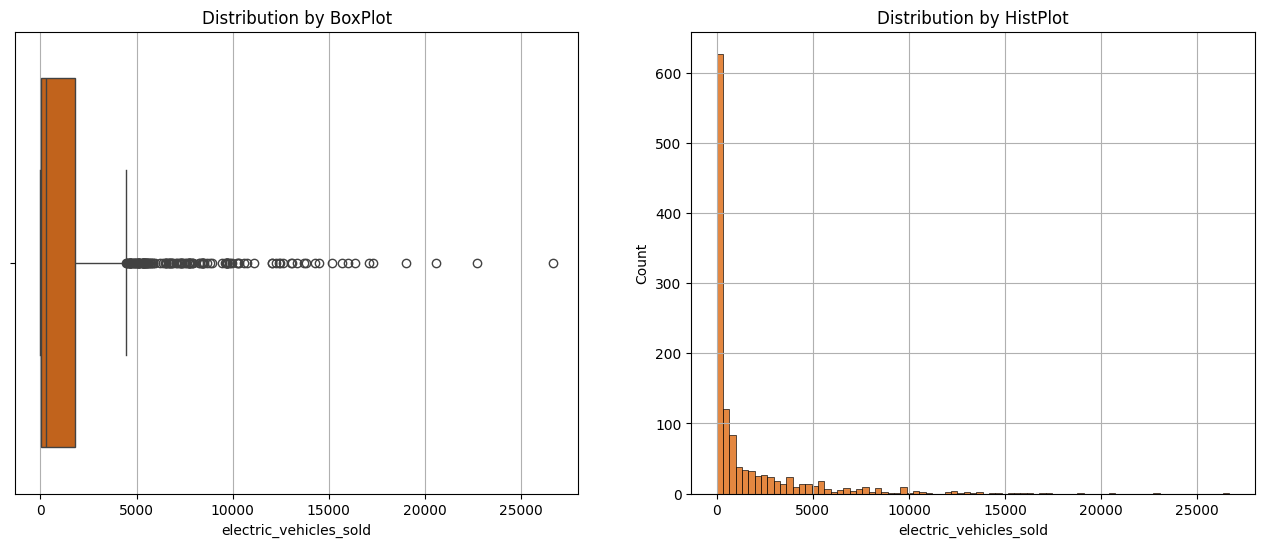

The Skew of 2-Wheelers Sold Data is: 3.27


In [ ]:
# overview of outliers
# set the size of chart
plt.figure(figsize=(16,6))
# first subplot by box plot
plt.subplot(1,2,1)
plt.grid()
sns.boxplot(data=state_wheeler_2, x='electric_vehicles_sold', color='#DC5F00')
plt.title("Distribution by BoxPlot")
# second subplot by hist plot
plt.subplot(1,2,2)
plt.grid()
sns.histplot(data=state_wheeler_2, x='electric_vehicles_sold', color='#DC5F00')
plt.title("Distribution by HistPlot")
# plot the chart
plt.show()
# Check the skewness of data in the "sold_quantity" column
print(f"The Skew of 2-Wheelers Sold Data is: {round(state_wheeler_2['electric_vehicles_sold'].skew(), 2)}")

In [ ]:
# check the outliers, find out the upper bound, lower bound of the electric vehicles sold column
bound_state_wheelers_2_sold = check_outlier(state_wheeler_2, 'electric_vehicles_sold')
# print out the required information
print(f"lower bound is {bound_state_wheelers_2_sold['lower_bound'].values[0]}")
print(f"median is {bound_state_wheelers_2_sold['median'].values[0]}")
print(f"upper bound is {bound_state_wheelers_2_sold['upper_bound'].values[0]}")
print(f"percentage of electric vehicles sold that are outliers is {bound_state_wheelers_2_sold['percent_outliers'].values[0]}%")

lower bound is -2663.0
median is 282.0
upper bound is 4457.0
percentage of electric vehicles sold that are outliers is 11.28%


In [ ]:
# Filter rows with electric vehicles sold quantity greater than upper bound of electric vehicles sold
outliers_state_wheelers_2_sold = state_wheeler_2[state_wheeler_2['electric_vehicles_sold']>bound_state_wheelers_2_sold['upper_bound'].values[0]]
# check how many rows are outliers
print(f"The total number of outliers is {outliers_state_wheelers_2_sold.shape[0]}")

The total number of outliers is 138


C:\Users\PC\AppData\Local\Temp\ipykernel_13080\2133925084.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  outliers_state_wheelers_2['date'] = pd.to_datetime(outliers_state_wheelers_2['date'])


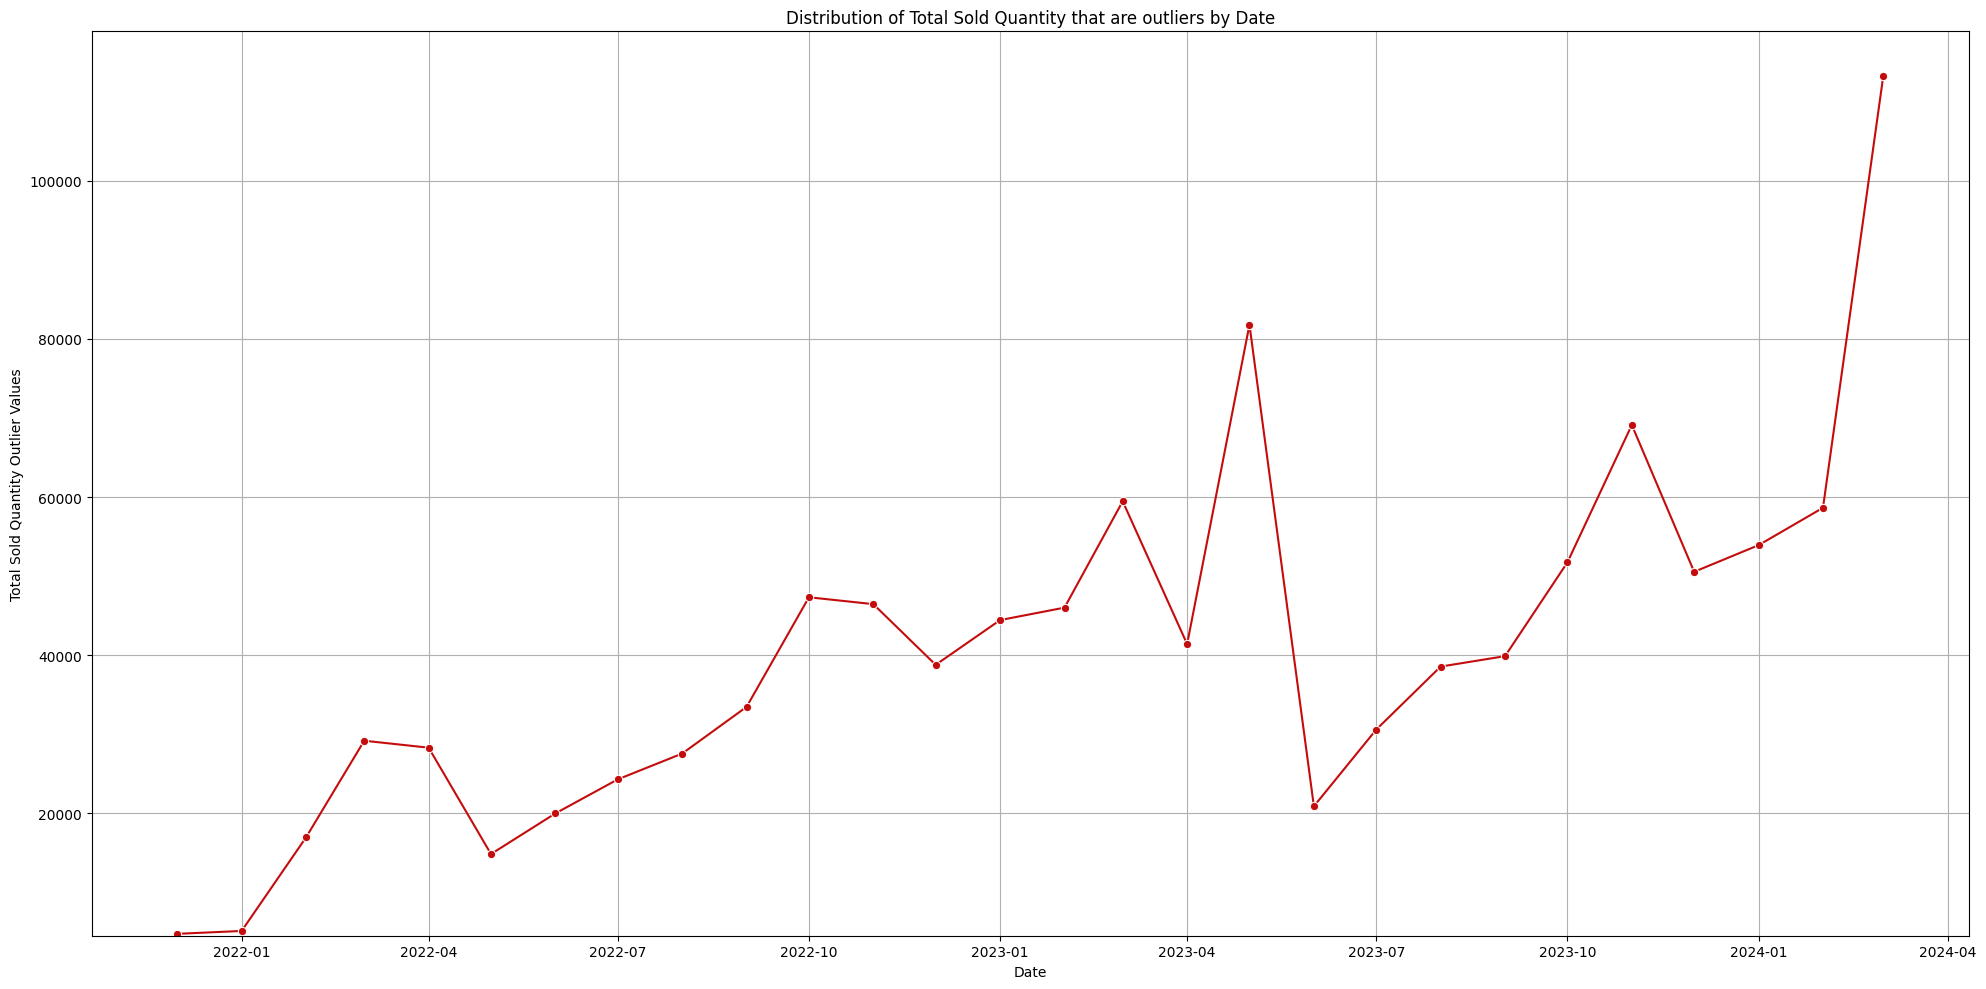

In [ ]:
# groupby 'electric_vehicles_sold' by 'date',and 'state'
outliers_state_wheelers_2 = outliers_state_wheelers_2_sold.groupby(['date']).agg(total_sold=('electric_vehicles_sold','sum')).reset_index()
outliers_state_wheelers_2['date'] = pd.to_datetime(outliers_state_wheelers_2['date'])
# set the size of the figure
plt.figure(figsize=(20,10))
# plot the line chart for the column
ax = sns.lineplot(data=outliers_state_wheelers_2, x='date', y='total_sold', marker='o', color='#C40C0C')
# set the line chart for the column
plt.title("Distribution of Total Sold Quantity that are outliers by Date")
plt.xlabel('Date')
plt.ylabel('Total Sold Quantity Outlier Values')
plt.ylim(outliers_state_wheelers_2['total_sold'].min()*0.95, outliers_state_wheelers_2['total_sold'].max()*1.05) # set x-ticks with labels
plt.grid()
# Adjust layout
plt.tight_layout()
# show the plot
plt.show()

##### Handling Outlier of 'electric_vehicles_sold' column in DataFrame

In [35]:
# code here
# judgment

### Electric Vehicle Sales by Makers
- date: The date on which the sales data was recorded. Format: DD-MMM-YY. (Data is recorded on a monthly basis)
- vehicle_category: The category of the vehicle, specifying whether it is a 2-Wheeler or a 4-Wheeler.
- maker: The name of the manufacturer or brand of the electric vehicle.
- electric_vehicles_sold: The number of electric vehicles sold by the specified maker in the given category on the given date.

#### Gather basic information about the data

In [36]:
# Gather basic information about the data
sales_by_makers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    816 non-null    object
 1   vehicle_category        816 non-null    object
 2   maker                   816 non-null    object
 3   electric_vehicles_sold  816 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 25.6+ KB


In [37]:
# top records
sales_by_makers.head()

,date,vehicle_category,maker,electric_vehicles_sold
0,01-Apr-21,2-Wheelers,OLA ELECTRIC,0
1,01-Apr-22,2-Wheelers,OKAYA EV,0
2,01-May-21,2-Wheelers,OLA ELECTRIC,0
3,01-Jun-21,2-Wheelers,OLA ELECTRIC,0
4,01-Jul-21,2-Wheelers,OLA ELECTRIC,0


In [38]:
# last record
sales_by_makers.tail()

,date,vehicle_category,maker,electric_vehicles_sold
811,01-Mar-24,2-Wheelers,BGAUSS,3070
812,01-Mar-24,2-Wheelers,BATTRE ELECTRIC,625
813,01-Mar-24,2-Wheelers,KINETIC GREEN,3915
814,01-Mar-24,2-Wheelers,REVOLT,585
815,01-Mar-24,2-Wheelers,OTHERS,10579


#### Gather descriptive statistics about the data

In [39]:
# Gather descriptive statistics about the data
sales_by_makers.describe().T

,count,mean,std,min,25%,50%,75%,max
electric_vehicles_sold,816.0,2531.998775,4771.077333,0.0,42.0,662.0,2636.5,44630.0


#### Rename Columns
As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [40]:
# Display all column names
sales_by_makers.columns

Index(['date', 'vehicle_category', 'maker', 'electric_vehicles_sold'], dtype='object')

In [41]:
# Rename columns as needed
## code here

# Display all column names after the update
sales_by_makers.columns

Index(['date', 'vehicle_category', 'maker', 'electric_vehicles_sold'], dtype='object')

#### Check Unique values
Check for any Unique values in the data.

In [49]:
# check for unique values
sales_by_makers.nunique()

date                       36
vehicle_category            2
maker                      26
electric_vehicles_sold    603
dtype: int64

In [53]:
# check unique values in vehicle category column
print(f"{sales_by_makers['vehicle_category'].unique()}")
print(f"Number of Unique Vehicle Category in Data is {sales_by_makers['vehicle_category'].unique().shape[0]}")

['2-Wheelers' '4-Wheelers']
Number of Unique Vehicle Category in Data is 2


In [54]:
# check unique values in maker column
print(f"{sales_by_makers['maker'].unique()}")
print(f"Number of Unique Maker in Data is {sales_by_makers['maker'].unique().shape[0]}")

['OLA ELECTRIC' 'OKAYA EV' 'BYD India' 'PCA Automobiles' 'BMW India'
 'Volvo Auto India' 'KIA Motors' 'Mercedes -Benz AG' 'Tata Motors'
 'MG Motor' 'Mahindra & Mahindra' 'Hyundai Motor' 'HERO ELECTRIC'
 'OKINAWA' 'AMPERE' 'ATHER' 'PURE EV' 'TVS' 'REVOLT' 'BAJAJ' 'BEING'
 'JITENDRA' 'OTHERS' 'BGAUSS' 'BATTRE ELECTRIC' 'KINETIC GREEN']
Number of Unique Maker in Data is 26


#### Check missing values
Check for any missing values in the data.

##### Checking Missing Values

In [42]:
# Check for missing values
sales_by_makers.isnull().sum()

date                      0
vehicle_category          0
maker                     0
electric_vehicles_sold    0
dtype: int64

In [ ]:
# judgment:
# There are no missing values in the data.

##### Handling Missing Values

In [ ]:
# code here

#### Check duplicates
Check for any duplicate entries in the data.

##### Checking Duplicates Values

In [43]:
# Check for duplicates
sales_by_makers.duplicated().sum()

0

In [ ]:
# judgment:
# there are no rows contain duplicates. That is 0% of the data.

In [ ]:
# inspect some rows containing duplicates as needed
sales_by_states[sales_by_states.duplicated()].head()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold


In [44]:
# inspect some rows containing duplicates as needed
sales_by_makers[sales_by_makers.duplicated()].tail()

,date,vehicle_category,maker,electric_vehicles_sold


In [ ]:
# The above output shows the first five Occurrences of rows that are duplicated farther down in the DataFrame.
# How likely is it that these are legitimate entries? In other words, how plausible is it that two employees self-reported the exact same response for every column?

# You could perform a likelihood analysis by essentially applying Bayes' theorem and multiplying the probabilities of finding each value in each column, but this does not seem necessary.
# With several continuous variables across 10 columns, it seems very unlikely that these observations are legitimate. You can proceed by dropping them.

##### Handling Duplicates
Handling for any duplicate entries in the data.

In [45]:
# Drop duplicates and save resulting dataframe in a new variable as needed
# code here

# display first few rows of new DataFrame as needed
sales_by_makers.head()

,date,vehicle_category,maker,electric_vehicles_sold
0,01-Apr-21,2-Wheelers,OLA ELECTRIC,0
1,01-Apr-22,2-Wheelers,OKAYA EV,0
2,01-May-21,2-Wheelers,OLA ELECTRIC,0
3,01-Jun-21,2-Wheelers,OLA ELECTRIC,0
4,01-Jul-21,2-Wheelers,OLA ELECTRIC,0


#### Check Outliers
Check for outliers in the data.

##### Check outlier of sold quantity column in sales_by_makers DataFrame

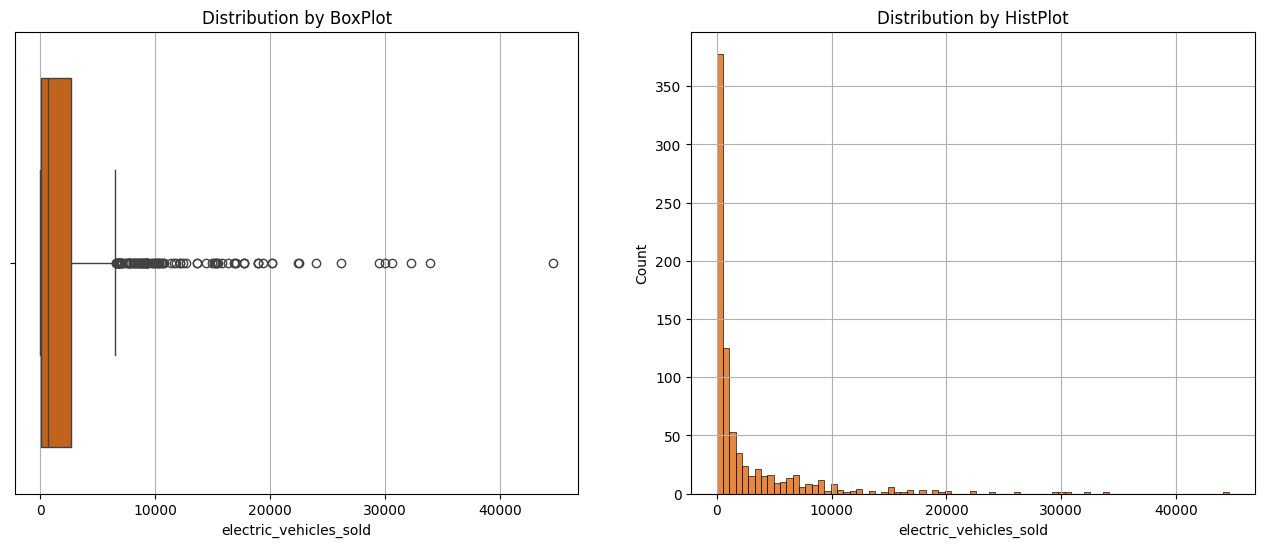

The Skew of Sold Quantity Data is: 3.61


In [46]:
# overview of outliers
# set the size of chart
plt.figure(figsize=(16,6))
# first subplot by box plot
plt.subplot(1,2,1)
plt.grid()
sns.boxplot(data=sales_by_makers, x='electric_vehicles_sold', color='#DC5F00')
plt.title("Distribution by BoxPlot")
# second subplot by hist plot
plt.subplot(1,2,2)
plt.grid()
sns.histplot(data=sales_by_makers, x='electric_vehicles_sold', color='#DC5F00')
plt.title("Distribution by HistPlot")
# plot the chart
plt.show()
# Check the skewness of data in the "sold_quantity" column
print(f"The Skew of Sold Quantity Data is: {round(sales_by_makers['electric_vehicles_sold'].skew(), 2)}")

In [ ]:
# check the outliers, find out the upper bound, lower bound of the electric vehicles sold column
bound_maker_sold = check_outlier(sales_by_makers, 'electric_vehicles_sold')
# print out the required information
print(f"lower bound is {bound_maker_sold['lower_bound'].values[0]}")
print(f"median is {bound_maker_sold['median'].values[0]}")
print(f"upper bound is {bound_maker_sold['upper_bound'].values[0]}")
print(f"percentage of electric vehicles sold that are outliers is {bound_maker_sold['percent_outliers'].values[0]}%")

lower bound is -3849.75
median is 662.0
upper bound is 6528.25
percentage of electric vehicles sold that are outliers is 12.75%


The data in the electric vehicles sold column has a lower bound of -796, and an upper bound of 1332.

Based on the data distribution in the previous electric vehicles sold column we learned about, the data is skewed to the right. Therefore, we will only focus on further exploration of the upper bound

Let's move on

In [ ]:
# Filter rows with electric vehicles sold quantity greater than upper bound of electric vehicles sold
outliers_maker_sold = sales_by_makers[sales_by_makers['electric_vehicles_sold']>bound_maker_sold['upper_bound'].values[0]]
# check how many rows are outliers
print(f"The total number of outliers is {outliers_maker_sold.shape[0]}")

The total number of outliers is 104


In [ ]:
# count the outlier electric vehicles sold values in each vehicle category
for i in outliers_maker_sold['vehicle_category'].unique():
    print(
        f"The number of Electric vehicles sold outliers for {i} vehicles category is {outliers_maker_sold[outliers_maker_sold['vehicle_category']==i]['vehicle_category'].count()}"
          )

The number of Electric vehicles sold outliers for 4-Wheelers vehicles category is 1
The number of Electric vehicles sold outliers for 2-Wheelers vehicles category is 103


##### Exploring "2-Wheelers" Vehicles Category

In [ ]:
# filter rows with 'vehicles category' is "2-Wheelers"
maker_wheeler_2 = sales_by_makers[sales_by_makers['vehicle_category']=='2-Wheelers']
# statistics values
stats_maker_wheelers_2 = maker_wheeler_2.groupby(['maker']).agg(
    min=('electric_vehicles_sold','min'),
    mean=('electric_vehicles_sold','mean'),
    median=('electric_vehicles_sold','median'),
    max=('electric_vehicles_sold','max')
).reset_index()
# check data after processing
stats_maker_wheelers_2

,maker,min,mean,median,max
0,AMPERE,147,4646.500000,4398.5,12446
1,ATHER,160,5679.138889,5828.0,17012
2,BAJAJ,20,4044.611111,2578.5,17716
3,BATTRE ELECTRIC,82,403.416667,269.5,1185
4,BEING,54,766.333333,893.0,1422
5,BGAUSS,189,1254.250000,1178.5,3070
6,HERO ELECTRIC,170,4733.166667,5695.0,13652
7,JITENDRA,13,518.250000,528.5,1256
8,KINETIC GREEN,201,798.750000,523.0,3915
9,OKAYA EV,0,1126.500000,1015.0,3831


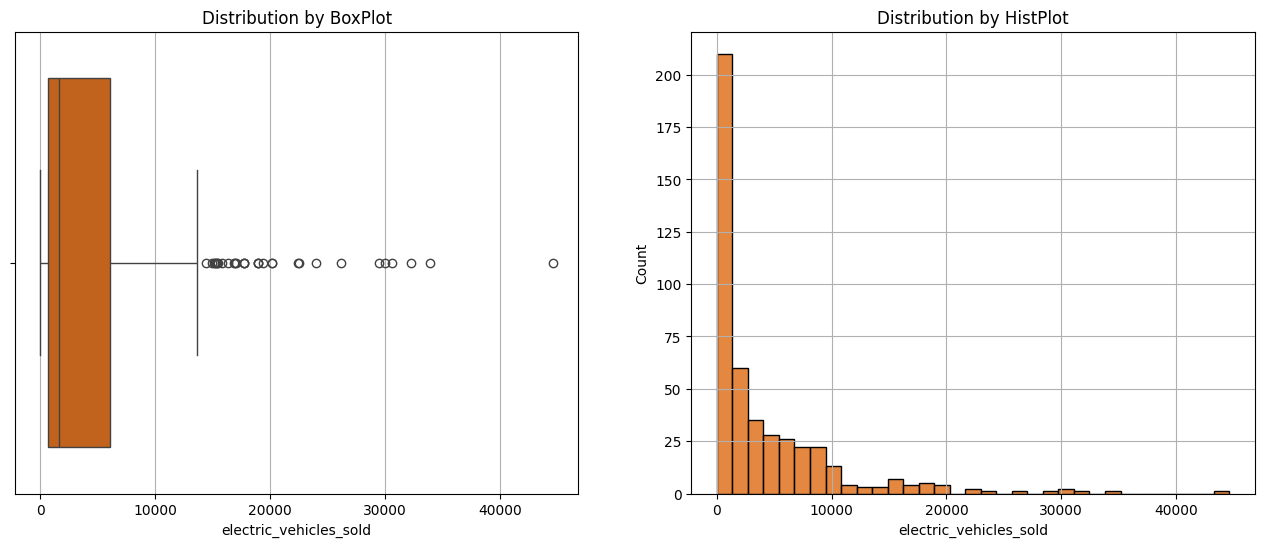

The Skew of 2-Wheelers Sold Data is: 2.76


In [ ]:
# overview of outliers
# set the size of chart
plt.figure(figsize=(16,6))
# first subplot by box plot
plt.subplot(1,2,1)
plt.grid()
sns.boxplot(data=maker_wheeler_2, x='electric_vehicles_sold', color='#DC5F00')
plt.title("Distribution by BoxPlot")
# second subplot by hist plot
plt.subplot(1,2,2)
plt.grid()
sns.histplot(data=maker_wheeler_2, x='electric_vehicles_sold', color='#DC5F00')
plt.title("Distribution by HistPlot")
# plot the chart
plt.show()
# Check the skewness of data in the "sold_quantity" column
print(f"The Skew of 2-Wheelers Sold Data is: {round(maker_wheeler_2['electric_vehicles_sold'].skew(), 2)}")

In [ ]:
# check the outliers, find out the upper bound, lower bound of the electric vehicles sold column
bound_maker_wheelers_2_sold = check_outlier(maker_wheeler_2, 'electric_vehicles_sold')
# print out the required information
print(f"lower bound is {bound_maker_wheelers_2_sold['lower_bound'].values[0]}")
print(f"median is {bound_maker_wheelers_2_sold['median'].values[0]}")
print(f"upper bound is {bound_maker_wheelers_2_sold['upper_bound'].values[0]}")
print(f"percentage of electric vehicles sold that are outliers is {bound_maker_wheelers_2_sold['percent_outliers'].values[0]}%")

lower bound is -7382.25
median is 1620.0
upper bound is 14081.75
percentage of electric vehicles sold that are outliers is 6.8%


In [ ]:
# Filter rows with electric vehicles sold quantity greater than upper bound of electric vehicles sold
outliers_maker_wheelers_2_sold = maker_wheeler_2[maker_wheeler_2['electric_vehicles_sold']>bound_maker_wheelers_2_sold['upper_bound'].values[0]]
# check how many rows are outliers
print(f"The total number of outliers is {outliers_maker_wheelers_2_sold.shape[0]}")

The total number of outliers is 31


C:\Users\PC\AppData\Local\Temp\ipykernel_13080\1559895754.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  outliers_maker_wheelers_2['date'] = pd.to_datetime(outliers_maker_wheelers_2['date'])


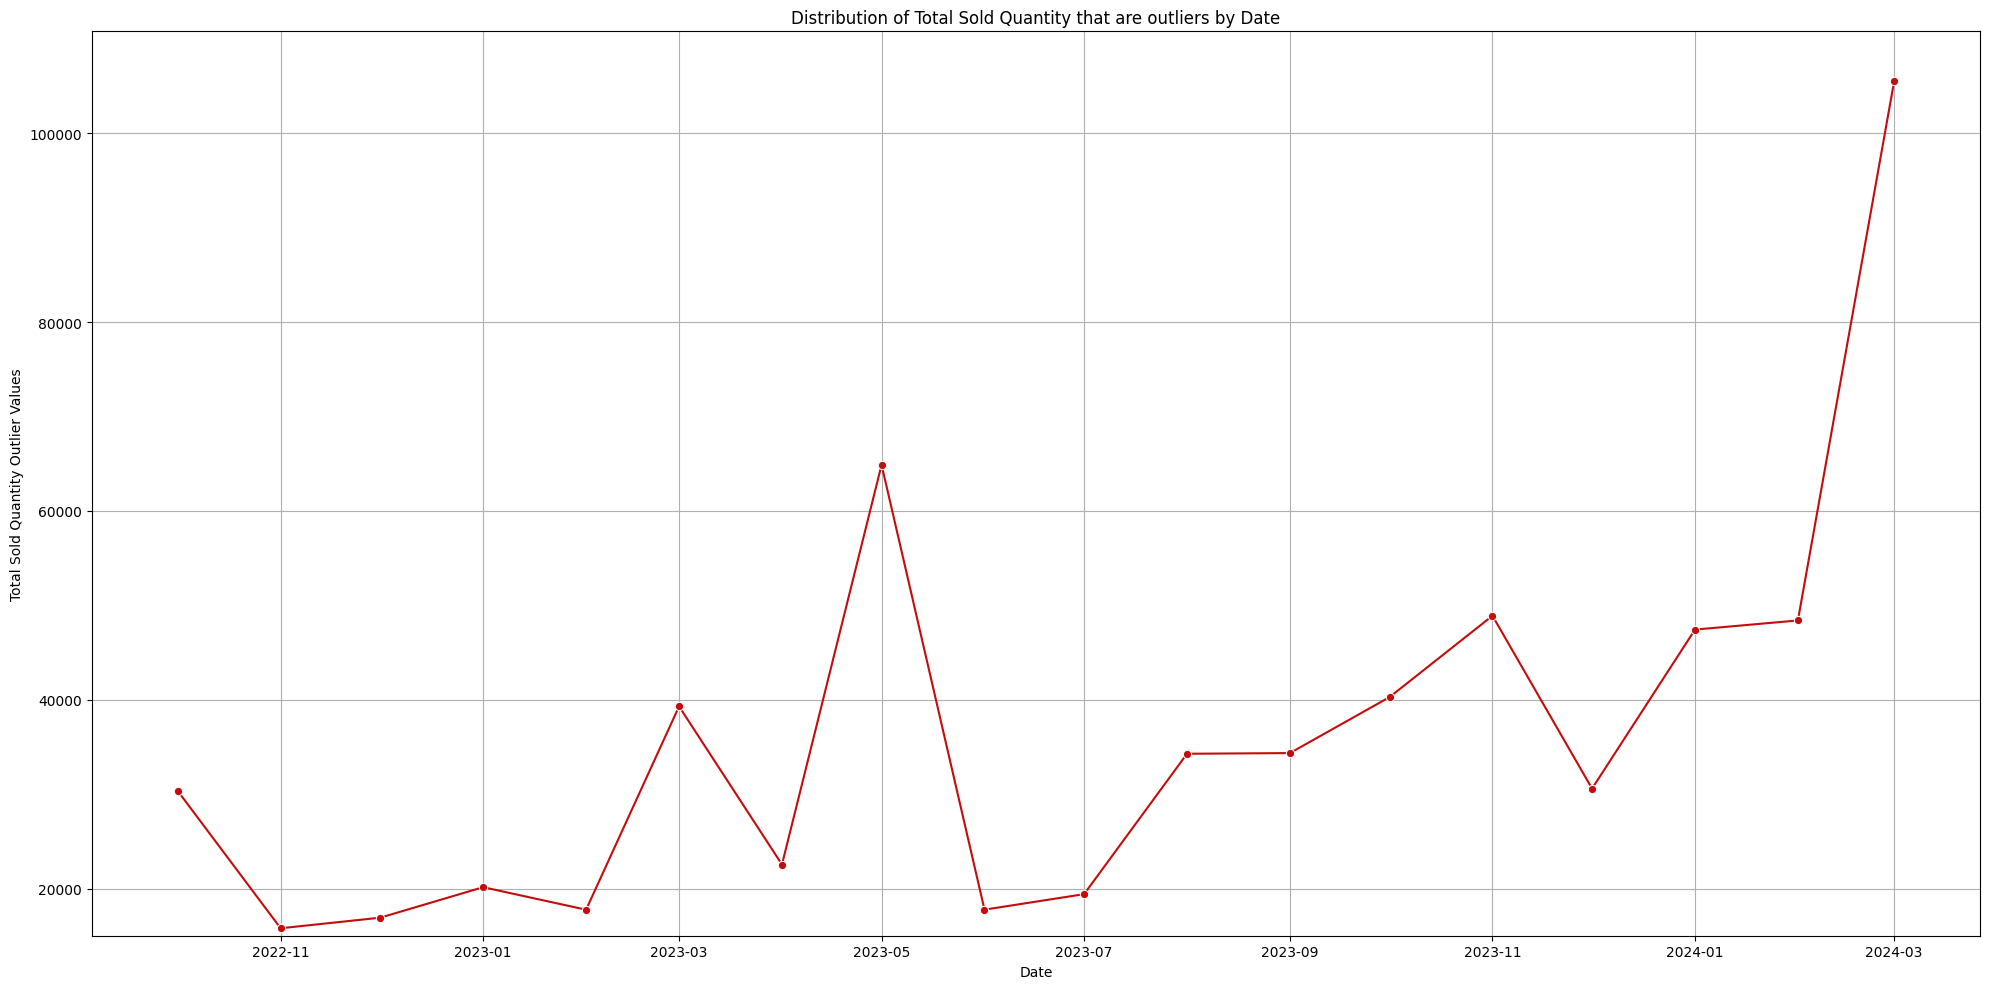

In [ ]:
# groupby 'electric_vehicles_sold' by 'date',and 'state'
outliers_maker_wheelers_2 = outliers_maker_wheelers_2_sold.groupby(['date']).agg(total_sold=('electric_vehicles_sold','sum')).reset_index()
outliers_maker_wheelers_2['date'] = pd.to_datetime(outliers_maker_wheelers_2['date'])
# set the size of the figure
plt.figure(figsize=(20,10))
# plot the line chart for the column
ax = sns.lineplot(data=outliers_maker_wheelers_2, x='date', y='total_sold', marker='o', color='#C40C0C')
# set the line chart for the column
plt.title("Distribution of Total Sold Quantity that are outliers by Date")
plt.xlabel('Date')
plt.ylabel('Total Sold Quantity Outlier Values')
plt.ylim(outliers_maker_wheelers_2['total_sold'].min()*0.95, outliers_maker_wheelers_2['total_sold'].max()*1.05) # set x-ticks with labels
plt.grid()
# Adjust layout
plt.tight_layout()
# show the plot
plt.show()

##### Handling Outlier of 'electric_vehicles_sold' column in DataFrame

In [47]:
# code here
# judgment

# Next Steps

### Dim Date
- date: The specific date for which the data is relevant. Format: DD-MMM-YY. (Data is recorded on a monthly basis)
- fiscal_year: The fiscal year to which the date belongs. This is useful for financial and business analysis.
- quarter: The fiscal quarter to which the date belongs. Fiscal quarters are typically divided as Q1, Q2, Q3, and Q4.

In [112]:
# top records
dim_date.head()

,date,fiscal_year,quarter
0,01-Apr-21,2022,Q1
1,01-May-21,2022,Q1
2,01-Jun-21,2022,Q1
3,01-Jul-21,2022,Q2
4,01-Aug-21,2022,Q2


In [113]:
# last records
dim_date.tail()

,date,fiscal_year,quarter
31,01-Nov-23,2024,Q3
32,01-Dec-23,2024,Q3
33,01-Jan-24,2024,Q4
34,01-Feb-24,2024,Q4
35,01-Mar-24,2024,Q4


In [114]:
# check the data type of all columns and non values present in each
dim_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         36 non-null     object
 1   fiscal_year  36 non-null     int64 
 2   quarter      36 non-null     object
dtypes: int64(1), object(2)
memory usage: 996.0+ bytes


In [115]:
# duplicated check
dim_date[dim_date.duplicated()]

,date,fiscal_year,quarter


In [116]:
# number of unique value in each column
dim_date.nunique()

date           36
fiscal_year     3
quarter         4
dtype: int64

In [117]:
# convert data types of date column to datetimes
dim_date['date'] = pd.to_datetime(dim_date['date'])
# check the latest date
print(f"The latest Date is {dim_date['date'].min()}")
# check the last date
print(f"The last Date is {dim_date['date'].max()}")

The latest Date is 2021-04-01 00:00:00
The last Date is 2024-03-01 00:00:00


C:\Users\PC\AppData\Local\Temp\ipykernel_13080\1075823594.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dim_date['date'] = pd.to_datetime(dim_date['date'])


In [118]:
# check unique values in fiscal year column
print(f"{dim_date['fiscal_year'].unique()}")
print(f"Number of Unique Fiscal Year in Data is {dim_date['fiscal_year'].unique().shape[0]}")

[2022 2023 2024]
Number of Unique Fiscal Year in Data is 3


In [119]:
# check unique values in quarter column
print(f"{dim_date['quarter'].unique()}")
print(f"Number of Unique Quarter in Data is {dim_date['quarter'].unique().shape[0]}")

['Q1' 'Q2' 'Q3' 'Q4']
Number of Unique Quarter in Data is 4


## Export Processed Data

In [138]:
# sales by states
#sales_by_states.to_csv("C:/Users/PC/Downloads/General_Motors-Provide_Insights_to_Chief_in_Electric_and_Hybrid_Vehicles/data/processed_data/electric_vehicle_sales_by_state.csv")
# sales by makers
#sales_by_makers.to_csv("C:/Users/PC/Downloads/General_Motors-Provide_Insights_to_Chief_in_Electric_and_Hybrid_Vehicles/data/processed_data/electric_vehicle_sales_by_makers.csv")

# pAce: Analyze Stage
Perform EDA (analyze relationships between variables) 

💭 
## Reflect on these questions as you complete the analyze stage.

- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data? 
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.